
## Steps

- Before you start
- Install YOLOv8
- Inference with Pre-trained COCO Model
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model


## Check for GPU

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that.

In [1]:
!nvidia-smi

Mon Jun 24 15:22:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
!python --version

Python 3.10.13


In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5689.4/8062.4 GB disk)


In [9]:
from ultralytics import YOLO

from IPython.display import display, Image

## Inference with Pre-trained COCO Model

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [8]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /kaggle/working/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 82.1ms
Speed: 2.7ms preprocess, 82.1ms inference, 461.6ms postprocess per image at shape (1, 3, 640, 384)


In [9]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [10]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [11]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [10]:
model = YOLO(f'/kaggle/working/runs/detect/train3/weights/best.pt')
results = model.predict(source='/kaggle/working/datasets/License-Plate-Recognition-4/test/images/pic_575_jpg.rf.dbe6f22f73d4ffad6834bc62295d770d.jpg', conf=0.25, save=True)


WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /kaggle/working/datasets/License-Plate-Recognition-4/test/images/pic_575_jpg.rf.dbe6f22f73d4ffad6834bc62295d770d.jpg: 640x640 1 License_Plate, 16.4ms
Speed: 5.7ms preprocess, 16.4ms inference, 702.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


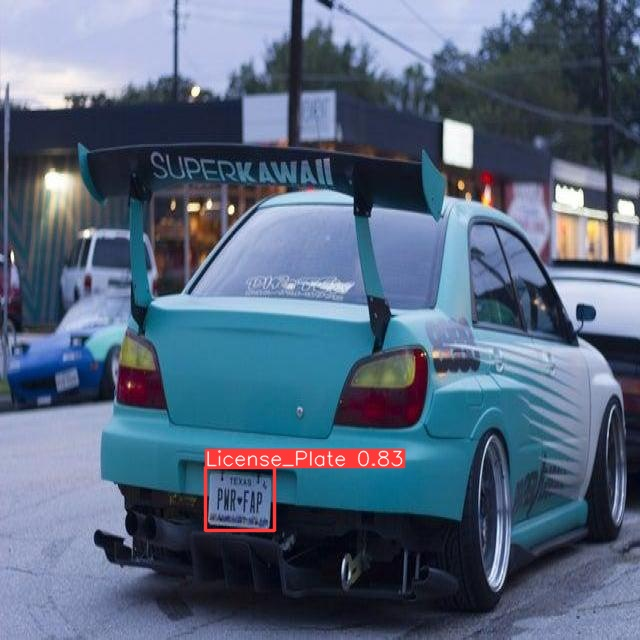

In [13]:
import os
os.listdir("runs/detect/predict3")
Image(filename='runs/detect/predict3/pic_575_jpg.rf.dbe6f22f73d4ffad6834bc62295d770d.jpg', height=600)

In [12]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(4)
dataset = version.download("yolov8")

/kaggle/working/datasets
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.2.1 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Recognition-4 in yolov8:: 100%|██████████| 48488/48488 [00:06<00:00, 8002.78it/s] 


## Custom Training

In [17]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True device=0,1

/kaggle/working
New https://pypi.org/project/ultralytics/8.2.41 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
                                                       CUDA:1 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/datasets/License-Plate-Recognition-4/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=(0, 1), workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_cr

In [20]:
!ls {HOME}/runs/detect/train3/


F1_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch19860.jpg
P_curve.png					   train_batch19861.jpg
R_curve.png					   train_batch19862.jpg
args.yaml					   train_batch2.jpg
confusion_matrix.png				   val_batch0_labels.jpg
confusion_matrix_normalized.png			   val_batch0_pred.jpg
events.out.tfevents.1719224567.cbc4f24541dc.263.0  val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
labels_correlogram.jpg				   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


/kaggle/working


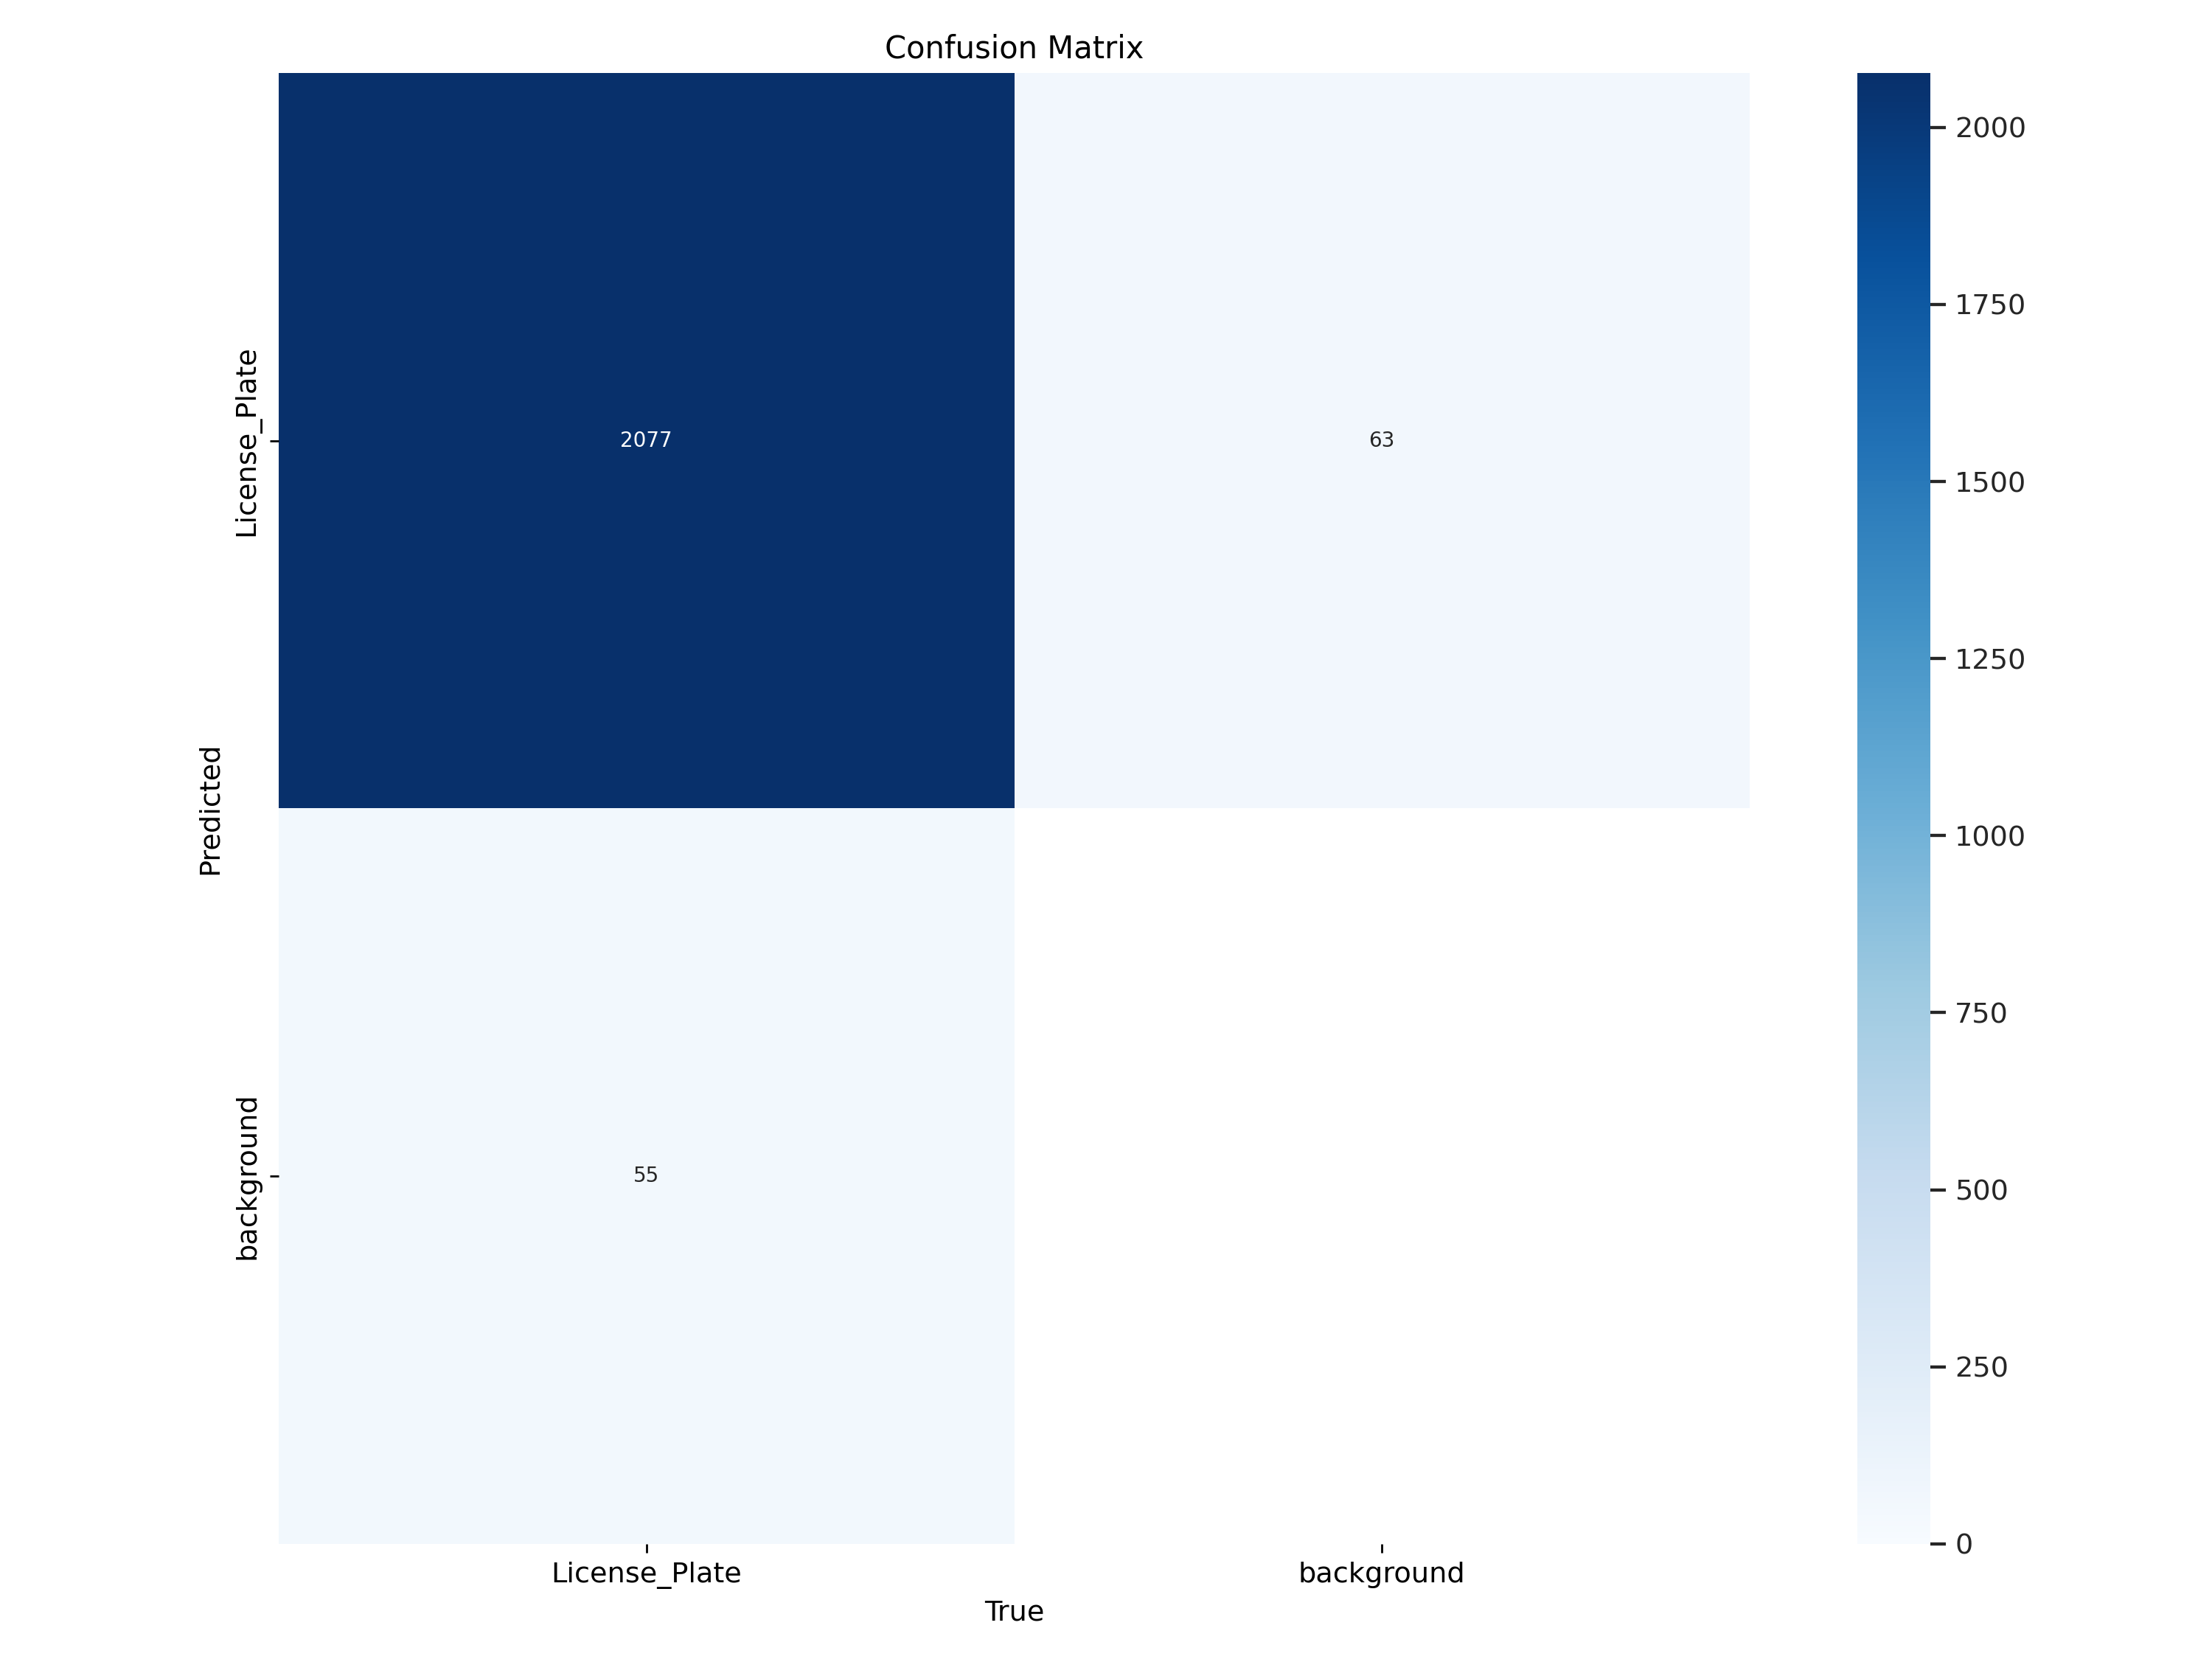

In [22]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

/kaggle/working


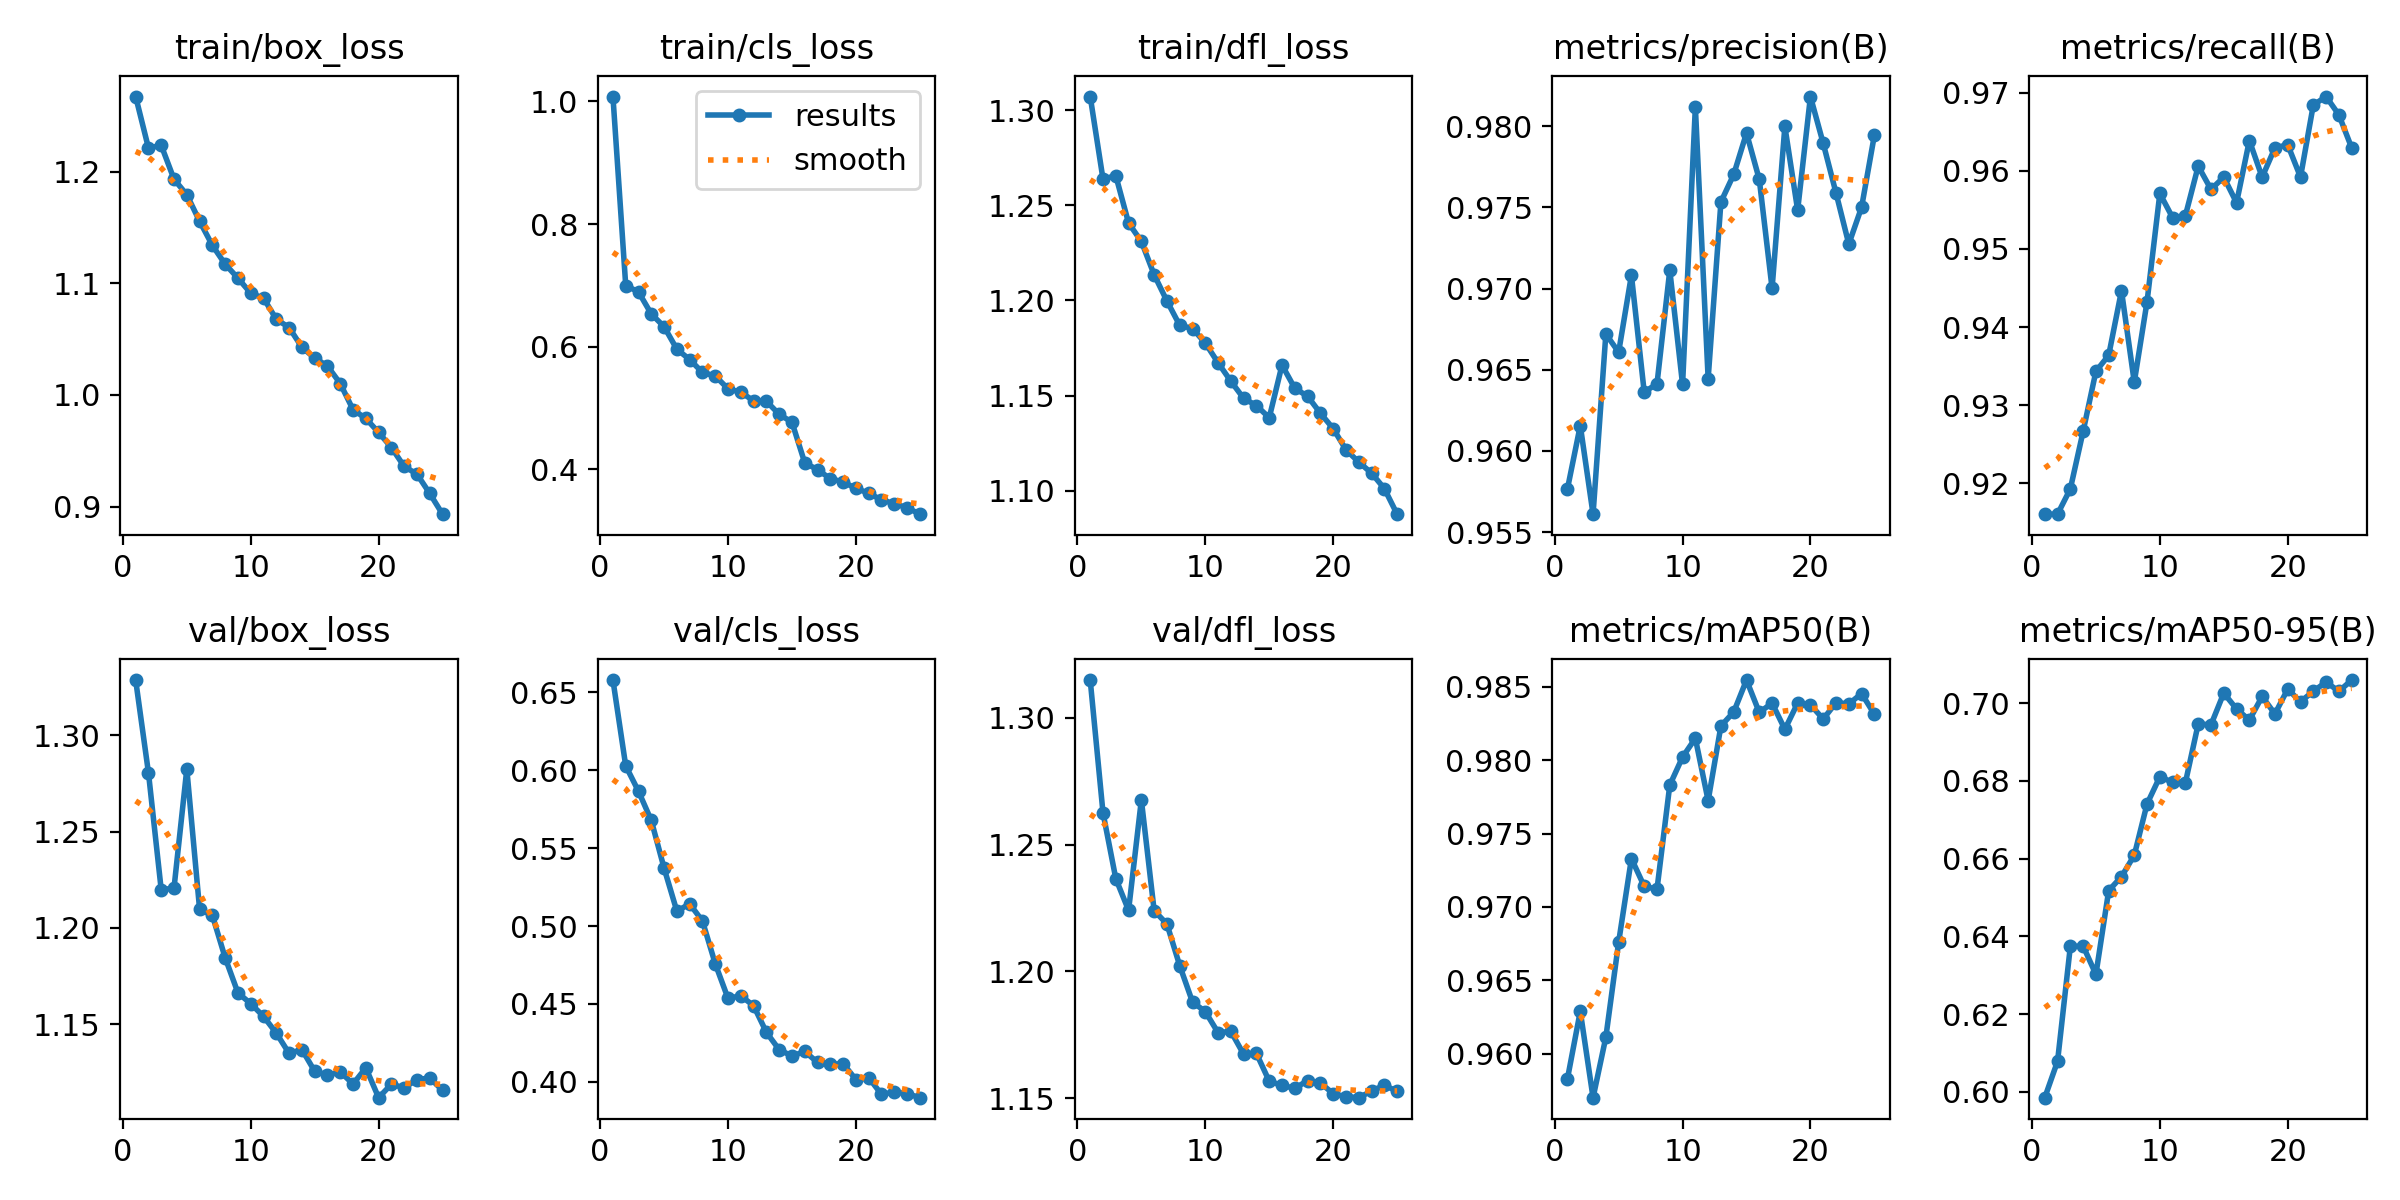

In [23]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

/kaggle/working


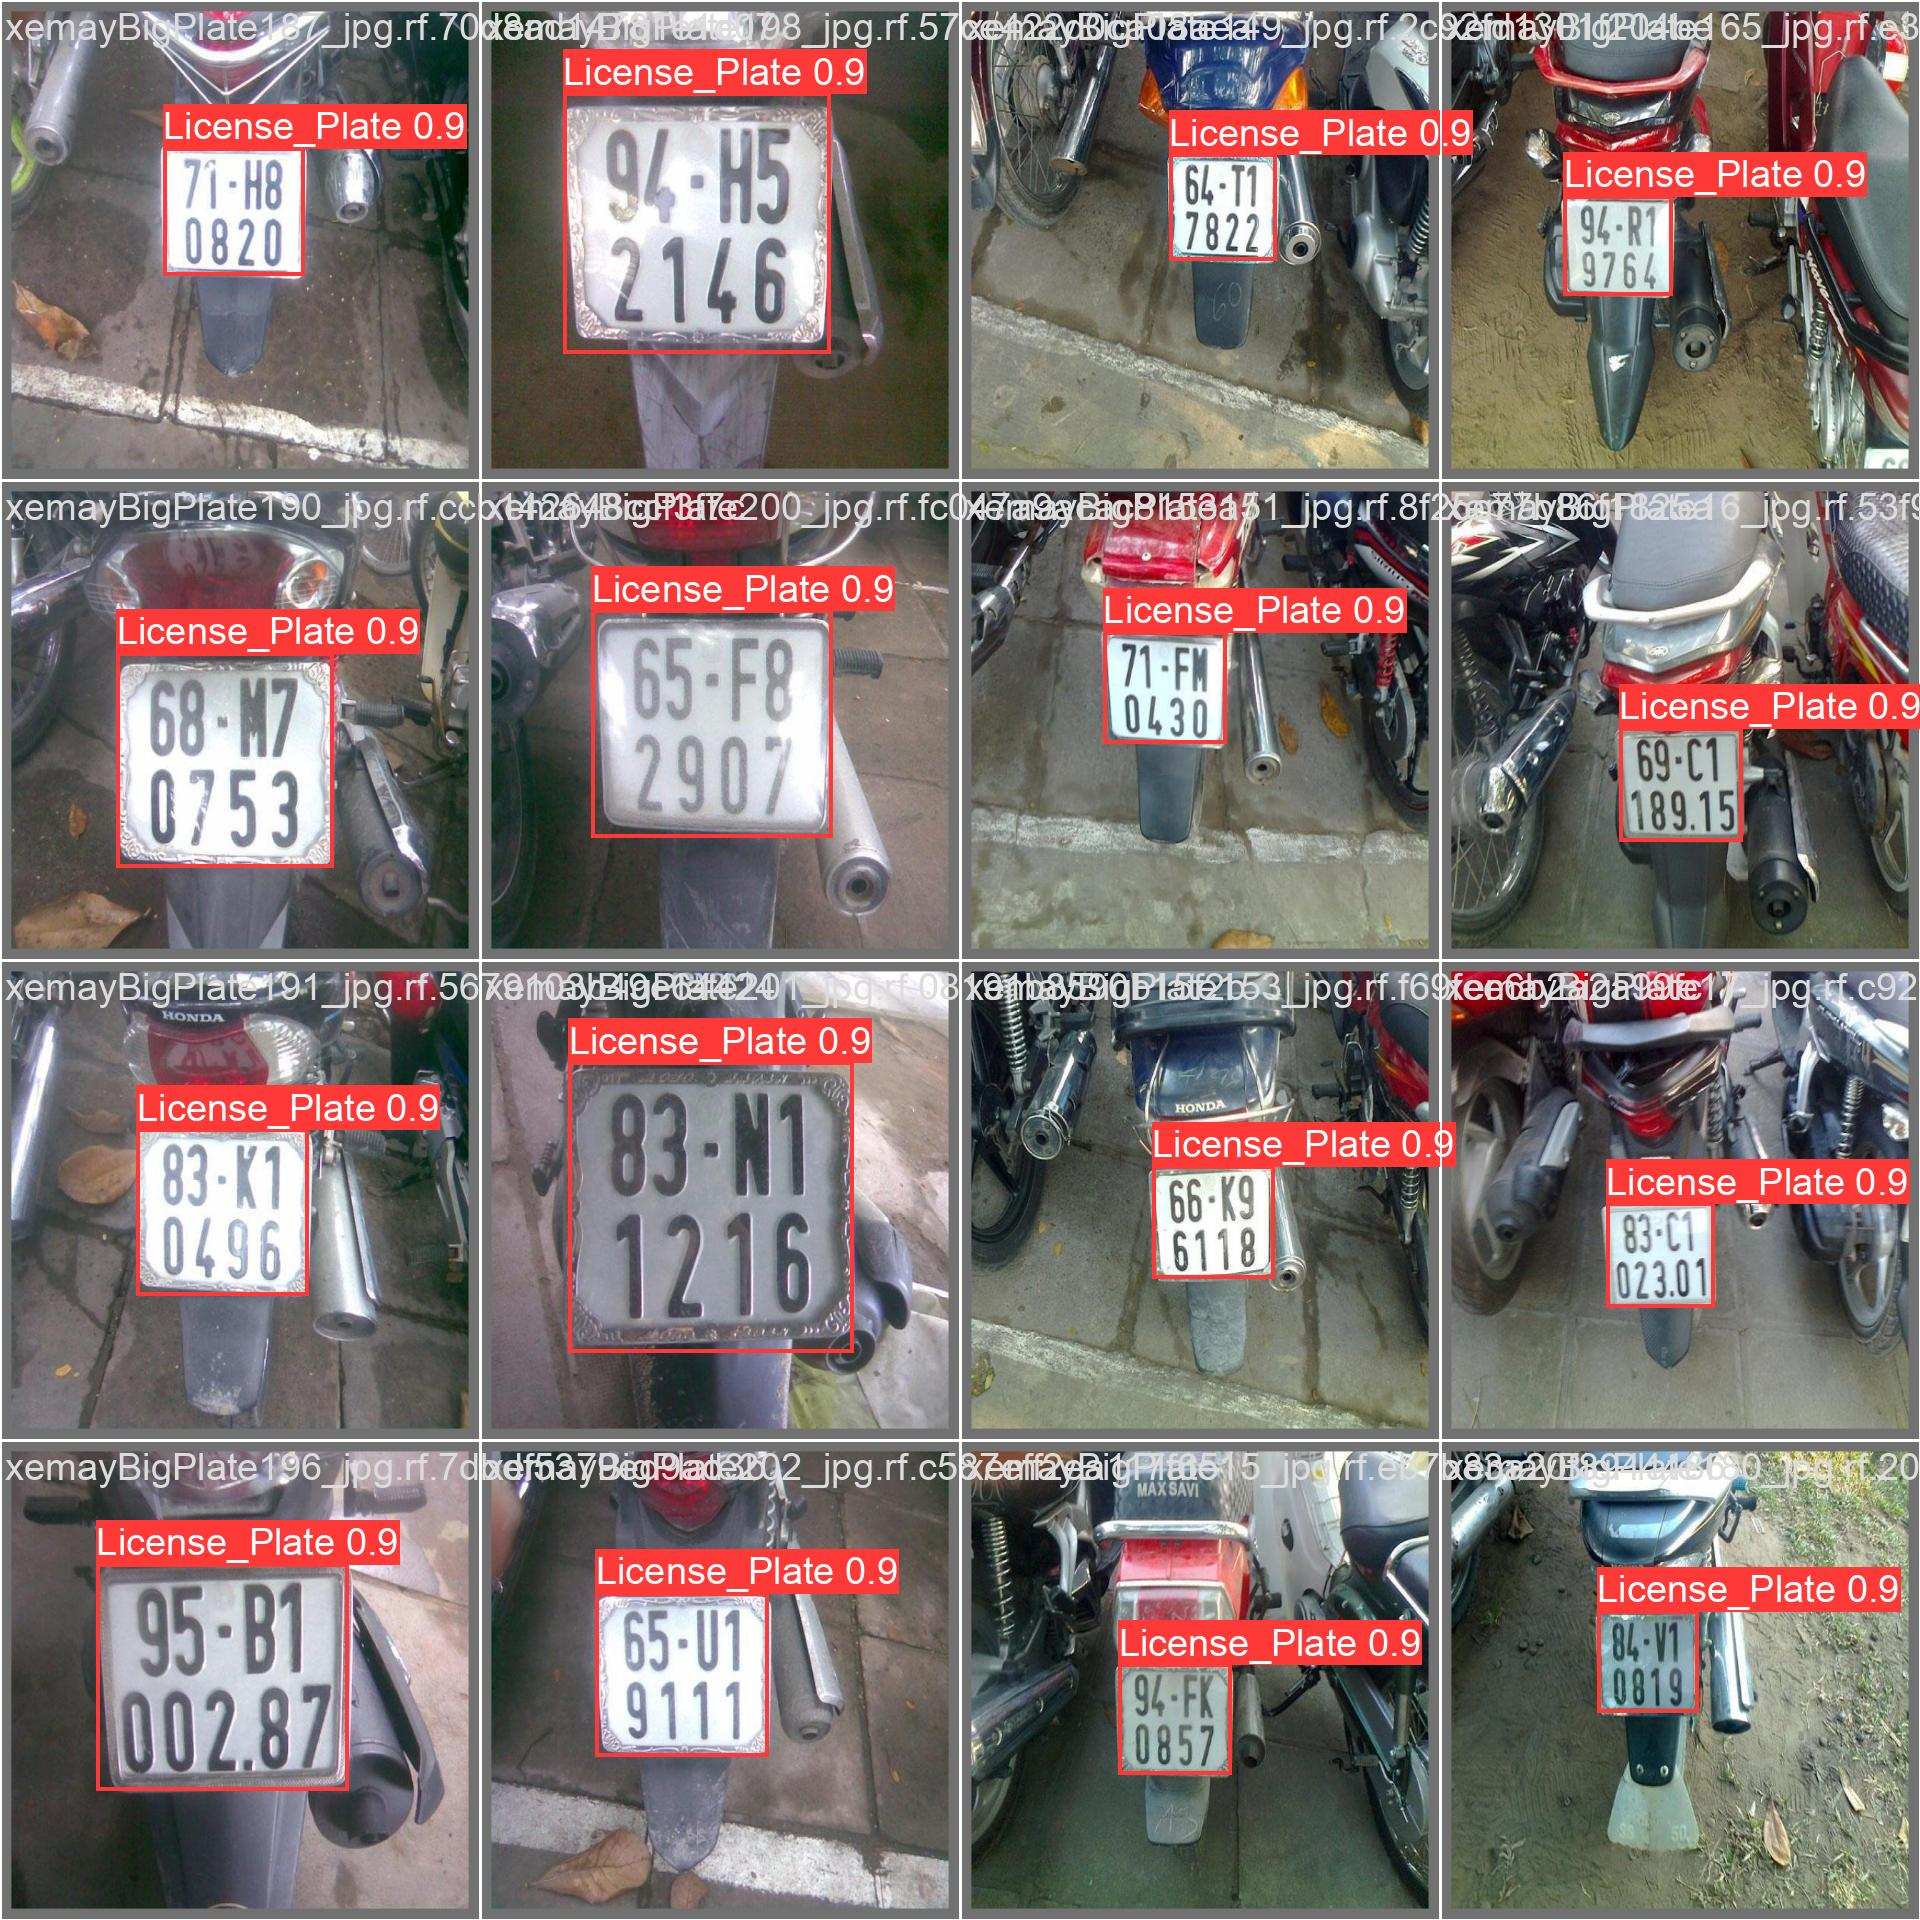

In [24]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

## Inference with Custom Model

In [27]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1019 /kaggle/working/datasets/License-Plate-Recognition-4/test/images/0002a5b67e5f0909_jpg.rf.07ca41e79eb878b14032f650f34d0967.jpg: 640x640 2 License_Plates, 16.3ms
image 2/1019 /kaggle/working/datasets/License-Plate-Recognition-4/test/images/000812dcf304a8e7_jpg.rf.559f904bc045f68ee947796a1b561d8f.jpg: 640x640 1 License_Plate, 16.3ms
image 3/1019 /kaggle/working/datasets/License-Plate-Recognition-4/test/images/0010f4c10f7ab07e_jpg.rf.92344aa620e23aacc490273e32343595.jpg: 640x640 1 License_Plate, 16.3ms
image 4/1019 /kaggle/working/datasets/License-Plate-Recognition-4/test/images/001cdd25e148cd36_jpg.rf.eca53e55e3cf5986bcfd95bc277b6438.jpg: 640x640 2 License_Plates, 16.2ms
image 5/1019 /kaggle/working/datasets/License-Plate-Recognition-4/test/images/002519f868563098_jpg.rf.b9450b9265c92d8d3bd96bdfeff6

**NOTE:** Let's take a look at few results.

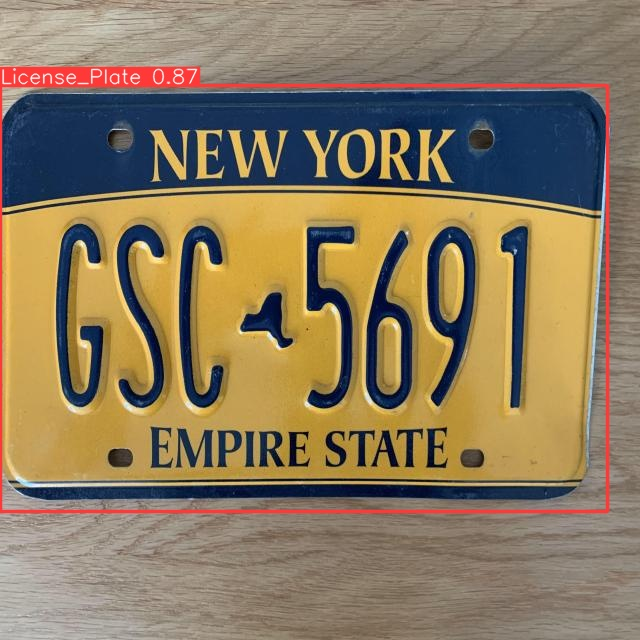

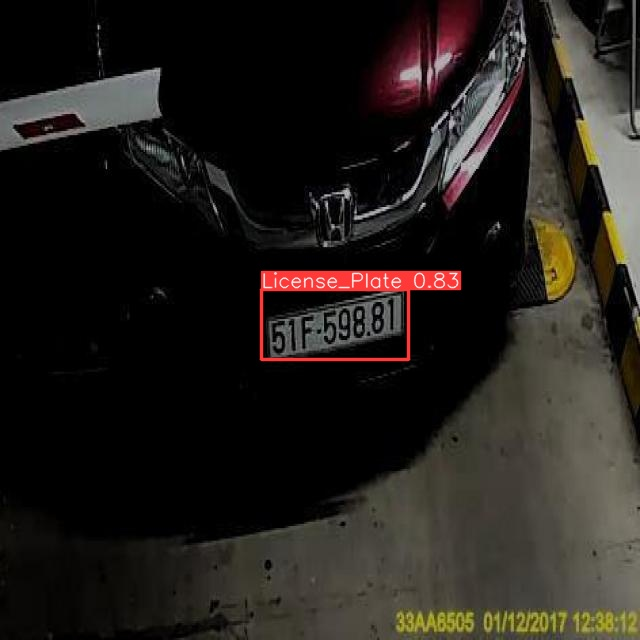

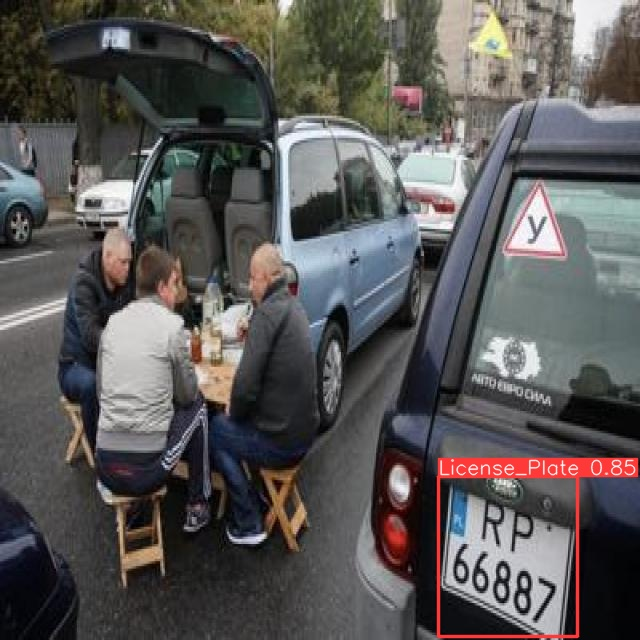

In [31]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")